# E-commerce Transaction and Customer Analysis

# Problem Statement
The objective of this analysis is to explore customer, seller, product, order, and payment details to derive actionable insights that can inform business decisions. The goal is to understand customer purchasing behavior, identify product trends, analyze geographical sales, and assess the performance of sellers. The analysis will also focus on key transaction metrics such as revenue, product sales, and payment methods. Additionally, the project can serve as a foundation for predictive modeling and recommendations, helping to identify high-value customers, forecast sales, and optimize the supply chain.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\customers.csv")

In [3]:
geolocation_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\geolocation.csv")
order_items_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\order_items.csv")
orders_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\orders.csv")
payments_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\payments.csv")
products_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\products.csv")
sellers_df=pd.read_csv("C:\\Users\\Gayatri\\Documents\\da project\\E Commerce Dataset\\sellers.csv")

In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
state_mapping = {
    'SP': 'São Paulo',
    'SC': 'Santa Catarina',
    'MG': 'Minas Gerais',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RS': 'Rio Grande do Sul',
    'PA': 'Pará',
    'GO': 'Goiás',
    'ES': 'Espírito Santo',
    'BA': 'Bahia',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'RN': 'Rio Grande do Norte',
    'PE': 'Pernambuco',
    'MT': 'Mato Grosso',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'AL': 'Alagoas',
    'RO': 'Rondônia',
    'PB': 'Paraíba',
    'TO': 'Tocantins',
    'PI': 'Piauí',
    'AC': 'Acre',
    'SE': 'Sergipe',
    'RR': 'Roraima'
}

customers_df['customer_state'] = customers_df['customer_state'].replace(state_mapping)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo


In [63]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [64]:
import mysql.connector

In [69]:
import os

In [70]:
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv', 'geolocation')
]

conn = mysql.connector.connect(
    host='localhost',        
    user='root',    
    password='pass123',
    database='ecommerce' 
)
cursor = conn.cursor()

folder_path = "C:\\Users\\Gayatri\\Documents\\da project\\E commerce project"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
  
    df = pd.read_csv(file_path)
    

    df = df.where(pd.notnull(df), None)
   
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

  
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

  
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    conn.commit()

conn.close()


# Total numbers of orders placed in each month

In [8]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [9]:
orders_df["order_purchase_timestamp"]=pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_2016_2017_2018=orders_df[orders_df["order_purchase_timestamp"].dt.year.isin([2016,2017,2018])]
orders_2016_2017_2018["year_month"]=orders_2016_2017_2018["order_purchase_timestamp"].dt.to_period("M")
monthly_order=orders_2016_2017_2018.groupby("year_month").size().reset_index(name="Counts")
monthly_order

,year_month,Counts
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


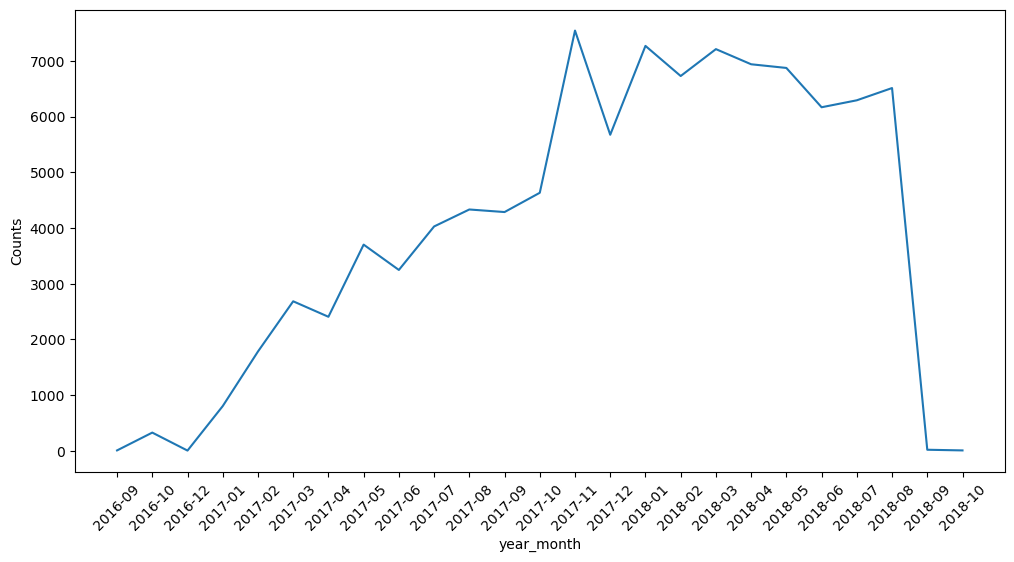

In [10]:
monthly_order["year_month"] = monthly_order["year_month"].astype(str)
plt.figure(figsize = (12,6))
sns.lineplot(x = "year_month",y = "Counts",data  = monthly_order) 
plt.xticks(rotation = 45)
plt.show()

In [11]:
most_payment_type_done=payments_df.groupby("payment_type").size().reset_index(name="Total_payments")
most_payment_type_done

,payment_type,Total_payments
0,UPI,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


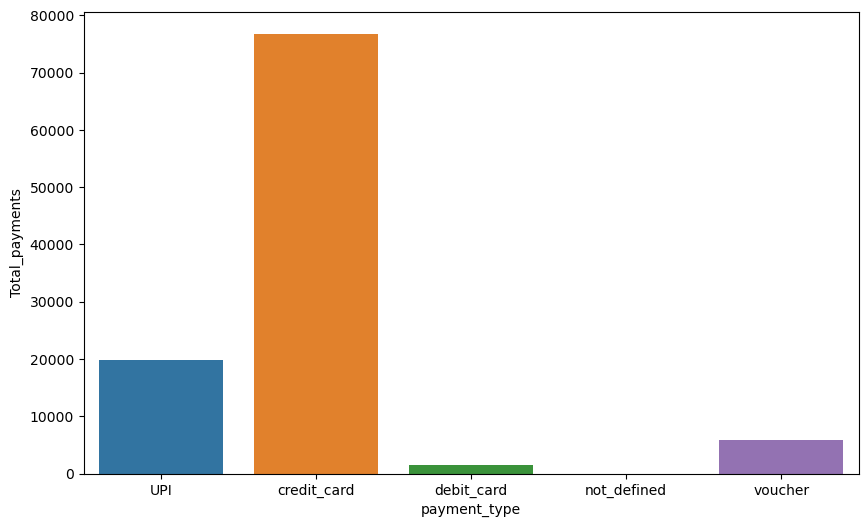

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="payment_type",y="Total_payments",data=most_payment_type_done)
plt.show()

# Total sales per category

In [13]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [14]:
products_df.columns

Index(['product_id', 'product category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [15]:
order_item_product_df=pd.merge(order_items_df,products_df,on="product_id")
order_item_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,Garden tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,Furniture Decoration,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,Watches present,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sport leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [16]:
payments_df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [17]:
merg_df=pd.merge(order_item_product_df,payments_df,on=("order_id"))
merg_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,UPI,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,4,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,Garden tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,1,credit_card,1,181.10
117597,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,Furniture Decoration,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,1,credit_card,2,112.52
117598,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,Watches present,33.0,658.0,3.0,400.0,19.0,9.0,15.0,1,credit_card,1,756.91
117599,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sport leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,1,credit_card,7,273.92


In [18]:
total_sales_per_category=merg_df.groupby("product category")["payment_value"].sum().sort_values(ascending = False).reset_index()
total_sales_per_category = total_sales_per_category.rename(columns={'product category': 'Category', 'payment_value': 'Sales'})
total_sales_per_category

,Category,Sales
0,bed table bath,1712553.67
1,HEALTH BEAUTY,1657373.12
2,computer accessories,1585330.45
3,Furniture Decoration,1430176.39
4,Watches present,1429216.68
...,...,...
68,PC Gamer,2174.43
69,House Comfort 2,1710.54
70,cds music dvds,1199.43
71,Fashion Children's Clothing,785.67


The analysis of total sales by product category reveals that the bed table bath category leads with sales of 1,712,553.67, followed closely by HEALTH BEAUTY at 1,657,373.12. Other notable categories include computer accessories and Furniture Decoration, indicating diverse customer interests and significant revenue contributions across various product segments.

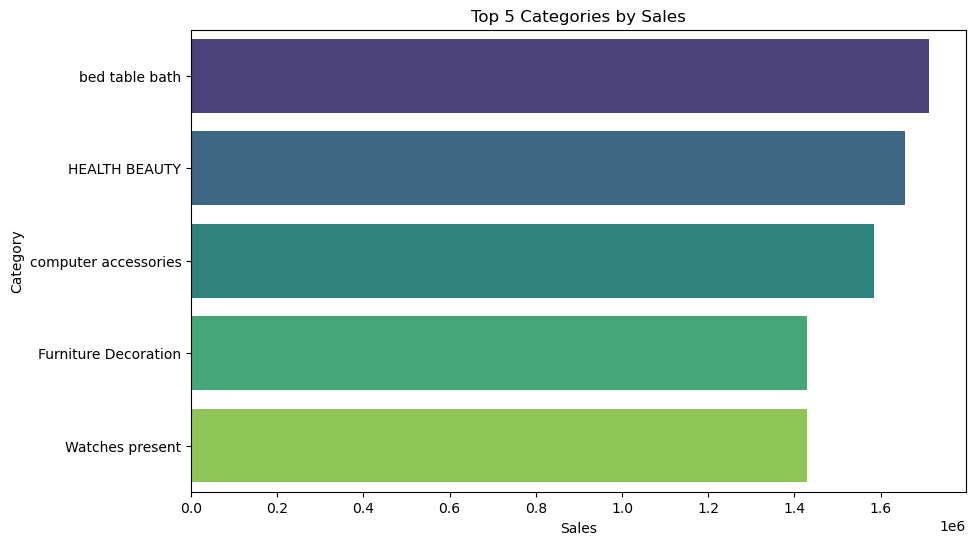

In [19]:
top_5_sales = total_sales_per_category.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=top_5_sales, palette='viridis')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.title('Top 5 Categories by Sales')
plt.grid(False)
plt.show()

# The percentage of orders that were paid in installments

In [20]:
total_orders = payments_df["order_id"].nunique()
total_orders

99440

In [21]:
orders_installement= payments_df[payments_df["payment_installments"] > 1]["order_id"].nunique()
orders_installement

51170

In [22]:
percentage_installments=(orders_installement/total_orders)*100
print(f"Percentage of orders paid in installments: {percentage_installments:.5f}%")
percentage_installments

Percentage of orders paid in installments: 51.45817%


51.45816572807723

# Total number of customers from each state

In [23]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [24]:
count_customers_from_each_state=customers_df['customer_state'].value_counts().reset_index().head(5)
count_customers_from_each_state

,customer_state,count
0,São Paulo,41746
1,Rio de Janeiro,12852
2,Minas Gerais,11635
3,Rio Grande do Sul,5466
4,Paraná,5045


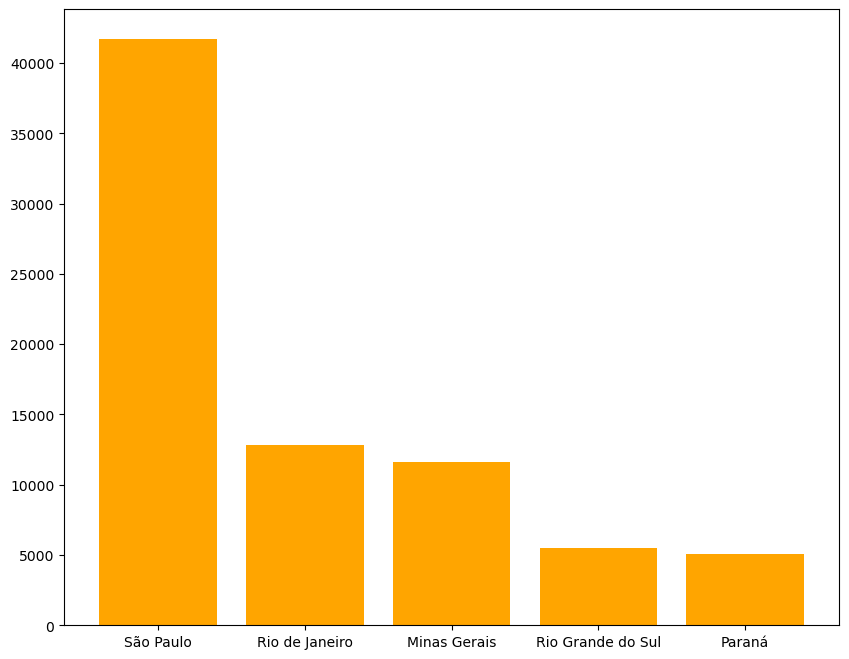

In [25]:
plt.figure(figsize=(10,8))

plt.bar(count_customers_from_each_state ["customer_state"],count_customers_from_each_state ["count"],color = "orange")
plt.show()

# Calculate the percentage of total revenue contributed by each product category.

In [26]:
products_order_items_df = products_df.merge(order_items_df, on='product_id')

merged_df = products_order_items_df.merge(payments_df, on='order_id')

category_sales = merged_df.groupby(merged_df['product category'].str.upper())['payment_value'].sum().reset_index()

total_sales = merged_df['payment_value'].sum()

category_sales['sales_percentage'] = round((category_sales['payment_value'] / total_sales) * 100, 2)

category_sales_sorted = category_sales[['product category', 'sales_percentage']].sort_values(by='sales_percentage', ascending=False)

category_sales_sorted.columns = ['Category', 'percentage distribution']

category_sales_sorted.head(10)


,Category,percentage distribution
7,BED TABLE BATH,8.43
44,HEALTH BEAUTY,8.16
15,COMPUTER ACCESSORIES,7.81
72,WATCHES PRESENT,7.04
38,FURNITURE DECORATION,7.04
67,SPORT LEISURE,6.86
49,HOUSEWARES,5.39
4,AUTOMOTIVE,4.20
42,GARDEN TOOLS,4.13
21,COOL STUFF,3.84


The analysis of sales distribution by product category reveals that Bed Table Bath leads with 8.43% of total sales, closely followed by Health Beauty at 8.16%. Other significant contributors include Computer Accessories and Watches Present, both exceeding 7%. This information highlights key areas for strategic focus and marketing efforts, as these categories demonstrate substantial customer interest and revenue potential. Targeting promotions and inventory management within these segments can enhance overall sales performance and optimize resource allocation.


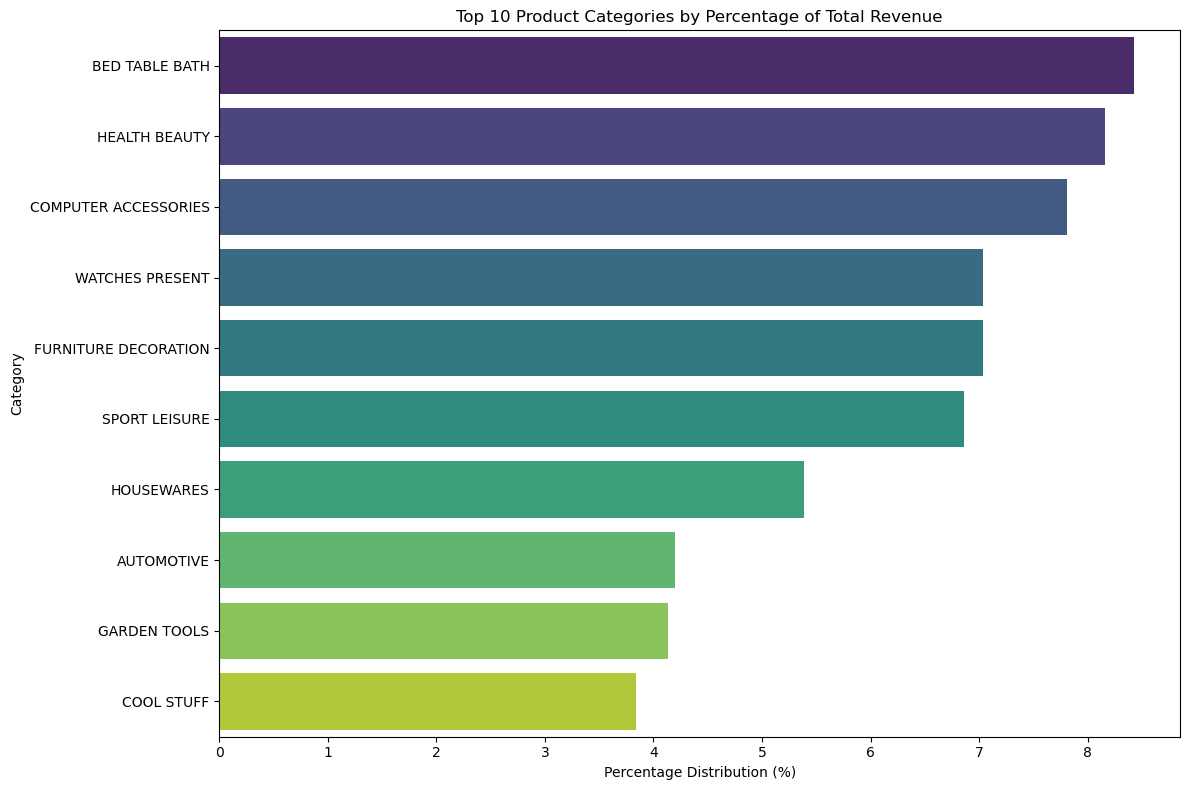

In [27]:
top_10_categories = category_sales_sorted.head(10)

plt.figure(figsize=(12, 8))

sns.barplot(x='percentage distribution', y='Category', data=top_10_categories, palette='viridis')

plt.xlabel('Percentage Distribution (%)')
plt.ylabel('Category')
plt.title('Top 10 Product Categories by Percentage of Total Revenue')

plt.tight_layout()
plt.show()

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [28]:
seller_revenue_df = order_items_df.merge(payments_df, on='order_id').groupby('seller_id')['payment_value'].sum()
seller_revenue_df = seller_revenue_df.reset_index().assign(rank=lambda x: x['payment_value'].rank(method='dense', ascending=False).astype(int))
seller_revenue_df = seller_revenue_df.sort_values('rank').reset_index()
df = seller_revenue_df.head()
df

,index,seller_id,payment_value,rank
0,1535,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,192,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,881,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,368,1f50f920176fa81dab994f9023523100,290253.42,4
4,1013,53243585a1d6dc2643021fd1853d8905,284903.08,5


The revenue analysis by seller indicates a clear ranking of performance. The top seller, with a revenue of 507,166.91, significantly outpaces the competition, highlighting their strong market presence and effective sales strategies. The second and third-ranked sellers also demonstrate solid performance, with revenues of 308,222.04 and 301,245.27, respectively. This ranking provides valuable insights into seller effectiveness, suggesting potential areas for partnership and support to boost overall sales across the platform.

AttributeError: 'numpy.int32' object has no attribute 'startswith'

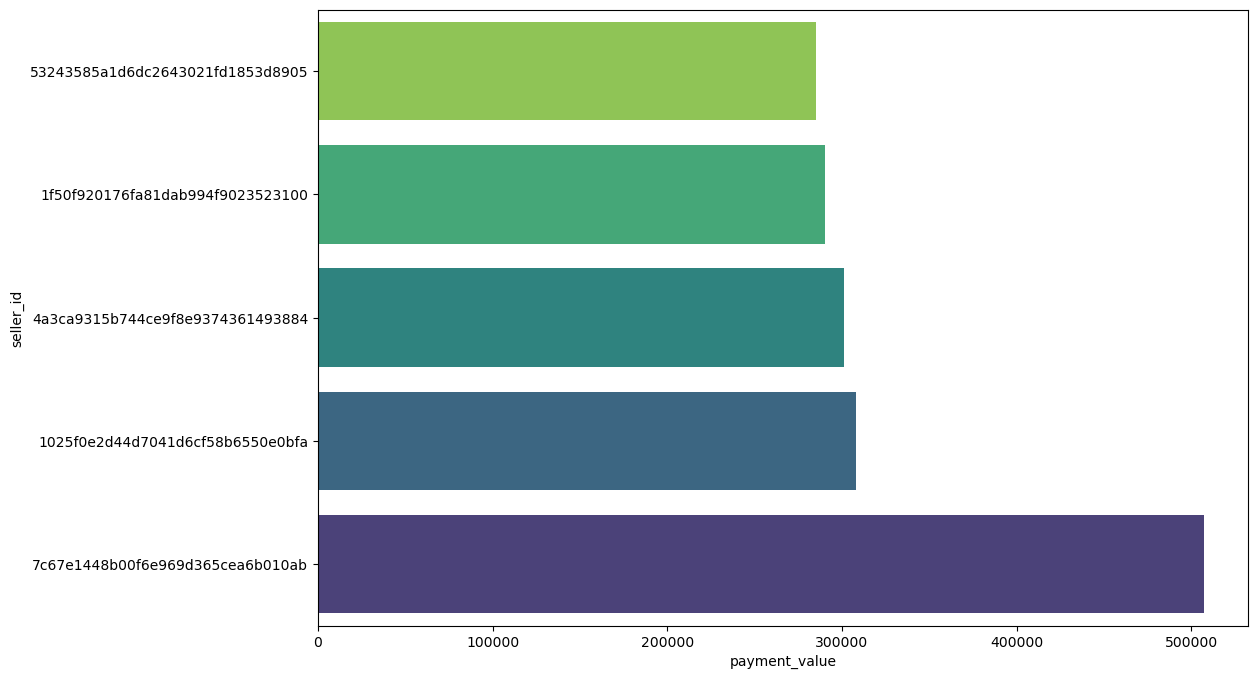

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='payment_value', y='seller_id', data=df, palette='viridis', hue='rank', dodge=False)
plt.xlabel('Total Revenue')
plt.ylabel('Seller ID')
plt.title('Top Sellers by Revenue')
plt.legend(title='Rank', loc='center right')
plt.tight_layout()
plt.show()

# The most frequently purchased products.


In [ ]:
merge_df = pd.merge(order_items_df,products_df,on = "product_id")
most_frequent_products = merge_df.groupby(["product category"]).size().reset_index(name="total_purchases").sort_values(by="total_purchases", ascending=False).head(10)
most_frequent_products

The analysis of product categories reveals that the "Bed Table Bath" category leads with 11,115 purchases, followed closely by "Health Beauty" with 9,670 purchases and "Sport Leisure" at 8,641 purchases. Other notable categories include "Furniture Decoration" and "Computer Accessories," with 8,334 and 7,827 purchases, respectively.

# Top 5  customer city where most orders are placed

In [ ]:
merged_data = pd.merge(customers_df, orders_df, on="customer_id")
total_orders_per_city = merged_data.groupby("customer_city").size().sort_values(ascending = False).reset_index(name="total_orders")
total_orders_per_city

We can see that São Paulo has the highest number of orders placed, with a total of 15,540 orders, followed by Rio de Janeiro with 6,882 orders. This indicates a strong market presence in São Paulo, suggesting that businesses may benefit from targeted marketing and resource allocation in this region to further capitalize on consumer demand.

# Top 5 products with the highest freight_value 

In [ ]:
top_5_freight_products = order_items_df.sort_values(by="freight_value", ascending=False).head(5)
top_5_freight_products

We can see the top five products with the highest freight values, highlighting significant shipping costs associated with these items. The product with the highest freight cost is linked to an order priced at $979.00 with a freight charge of $409.68 . Understanding these freight costs is crucial for pricing strategies and optimizing logistics, as high shipping fees can impact overall profitability and customer satisfaction.

In [ ]:
top_5_freight_products = top_5_freight_products.merge(products_df[['product_id', 'product category']], on='product_id')
plt.figure(figsize=(10, 6))
sns.barplot(x='freight_value', y='product category', data=top_5_freight_products, palette='viridis')
plt.title('Top 5 Products by Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# Total Orders and Average Freight Value per Seller

In [ ]:
seller_analysis = order_items_df.groupby('seller_id').agg( total_orders=('order_id', 'count'), avg_freight=('freight_value', 'mean')).reset_index()
seller_analysis = seller_analysis.sort_values(by='total_orders', ascending=False).head()
seller_analysis


In [ ]:
seller_analysis = seller_analysis.head()
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x='seller_id', y='total_orders', data=seller_analysis)
plt.title('Total Orders per Seller', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='seller_id', y='avg_freight', data=seller_analysis)
plt.title('Average Freight per Seller', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Average Freight', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
plt.show()

# Most Frequently Purchased Product

In [ ]:
most_frequent_product = order_items_df['product_id'].value_counts().reset_index().rename(columns={'index': 'product_id', 'product_id': 'product_count'}).head(5)
most_frequent_product

# Average Delivery Time per Seller

In [30]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
merged_df = pd.merge(order_items_df, orders_df[['order_id', 'order_delivered_customer_date']], on='order_id', how='inner')
merged_df['delivery_time_days'] = (merged_df['order_delivered_customer_date'] - merged_df['shipping_limit_date']).dt.days
avg_delivery_time_per_seller = merged_df.groupby('seller_id')['delivery_time_days'].mean().reset_index()
avg_delivery_time_per_seller


,seller_id,delivery_time_days
0,0015a82c2db000af6aaaf3ae2ecb0532,0.666667
1,001cca7ae9ae17fb1caed9dfb1094831,6.474359
2,001e6ad469a905060d959994f1b41e4f,NaN
3,002100f778ceb8431b7a1020ff7ab48f,8.851852
4,003554e2dce176b5555353e4f3555ac8,-2.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,NaN
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3.850000
3092,ffeee66ac5d5a62fe688b9d26f83f534,11.500000
3093,fffd5413c0700ac820c7069d66d98c89,7.500000


The analysis of average delivery times per seller reveals significant variability in performance. For instance, one seller boasts an impressive average delivery time of approximately 0.67 days, while another has an average of 8.85 days. Notably, some sellers even exhibit negative delivery times, suggesting potential data discrepancies. This information is crucial for identifying top-performing sellers and addressing logistical challenges, ultimately enhancing customer satisfaction and operational efficiency.

# Total Freight and Average Price per Product Category

In [31]:
merged_df = pd.merge(order_items_df, products_df, on='product_id')
category_analysis = merged_df.groupby('product category').agg(total_freight=('freight_value', 'sum'),avg_price=('price', 'mean')).reset_index()
category_analysis

,product category,total_freight,avg_price
0,Agro Industria e Comercio,5843.60,342.124858
1,Art,4045.17,115.802105
2,Arts and Crafts,370.13,75.583750
3,Bags Accessories,30445.23,128.598883
4,Blu Ray DVDs,1288.74,93.740469
...,...,...,...
68,sport leisure,168607.51,114.344285
69,stationary store,46798.48,91.753369
70,technical books,4283.06,71.520824
71,telephony,71215.79,71.213978


The category analysis highlights that "Sport Leisure" incurs the highest total freight costs, amounting to approximately 168,607.51, while also maintaining a competitive average price of 114.34. In contrast, "Agro Industria e Comercio" and "Bags Accessories" also demonstrate significant freight expenditures, indicating strong demand in these categories. Understanding these patterns can guide strategic decisions in inventory management and pricing to maximize profitability and efficiency.

# Count of Orders Delivered on Time

In [32]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

merged_df = pd.merge(order_items_df, orders_df[['order_id', 'order_delivered_customer_date']], on='order_id', how='inner')

on_time_deliveries = merged_df[merged_df['order_delivered_customer_date'] <= merged_df['shipping_limit_date']].shape[0]

print(f"On-time deliveries: {on_time_deliveries}")


On-time deliveries: 23013


The analysis reveals that there are 23,013 on-time deliveries, indicating a robust performance in meeting delivery deadlines. This suggests effective logistics and order management processes, which can enhance customer satisfaction and loyalty. Maintaining this standard of timely deliveries will be crucial for sustaining positive customer experiences and driving future sales.

# Total number of orders placed per customer city

In [33]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [34]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [35]:
merged_df=pd.merge(customers_df,orders_df,on='customer_id')
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,São Paulo,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,São Paulo,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,Ceará,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,Rio Grande do Sul,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [36]:
total_order_per_customer_city= merged_df.groupby("customer_city").size().sort_values(ascending = False).reset_index(name= "Total_Orders").head(5)
total_order_per_customer_city .head()

,customer_city,Total_Orders
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


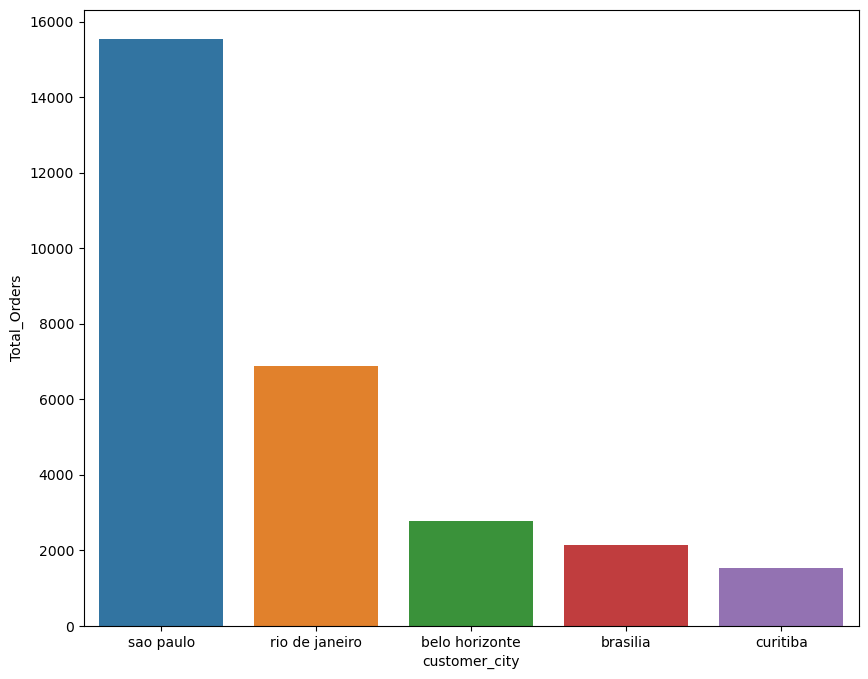

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x="customer_city",y="Total_Orders",data=total_order_per_customer_city)
plt.show()

# The total numbers of orders placed in each year

In [38]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [40]:
data_2016= orders_df[orders_df["order_purchase_timestamp"].dt.year == 2016]
data_2017= orders_df[orders_df["order_purchase_timestamp"].dt.year == 2017]
data_2018= orders_df[orders_df["order_purchase_timestamp"].dt.year == 2018]
count_orders_2016 = data_2016.shape[0]
count_orders_2017 = data_2017.shape[0]
count_orders_2018 = data_2018.shape[0]
print(f"Number of orders place in 2016 is:- {count_orders_2016}")
print(f"Number of orders place in 2017 is:- {count_orders_2017}")
print(f"Number of orders place in 2018 is:- {count_orders_2018}")

Number of orders place in 2016 is:- 329
Number of orders place in 2017 is:- 45101
Number of orders place in 2018 is:- 54011


# Orders were delivered on or before the shipping limit date.

In [41]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [42]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [43]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [44]:
order_items_df["shipping_limit_date"]=pd.to_datetime(order_items_df['shipping_limit_date'])

In [45]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

In [46]:
orders_items_df = pd.merge(orders_df, order_items_df, on='order_id')
orders_items_df 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [47]:
count_delivered_on_time = orders_items_df[ orders_items_df['order_delivered_customer_date'] <= orders_items_df['shipping_limit_date']].shape[0]
print("Number of orders delivered on or before the shipping limit date:",count_delivered_on_time)

Number of orders delivered on or before the shipping limit date: 23013


In [48]:
products_df.columns

Index(['product_id', 'product category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [49]:
merg_data=pd.merge(products_df,order_items_df,on="product_id")
merg_data

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [50]:
total_freight_weight_for_each_category=merg_data.groupby("product category")["freight_value"].sum().sort_values(ascending = False).reset_index()
total_freight_weight_for_each_category

,product category,freight_value
0,bed table bath,204693.04
1,HEALTH BEAUTY,182566.73
2,Furniture Decoration,172749.30
3,sport leisure,168607.51
4,computer accessories,147318.08
...,...,...
68,Kitchen portable and food coach,309.76
69,cds music dvds,224.99
70,PC Gamer,133.57
71,Fashion Children's Clothing,95.51


In [51]:
payments_df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

# The average payment value for each payment method.

In [52]:
average_payment_for_each_payment_method=payments_df.groupby("payment_type")["payment_value"].mean().reset_index()
average_payment_for_each_payment_method

,payment_type,payment_value
0,UPI,145.034435
1,credit_card,163.319021
2,debit_card,142.570170
3,not_defined,0.000000
4,voucher,65.703354


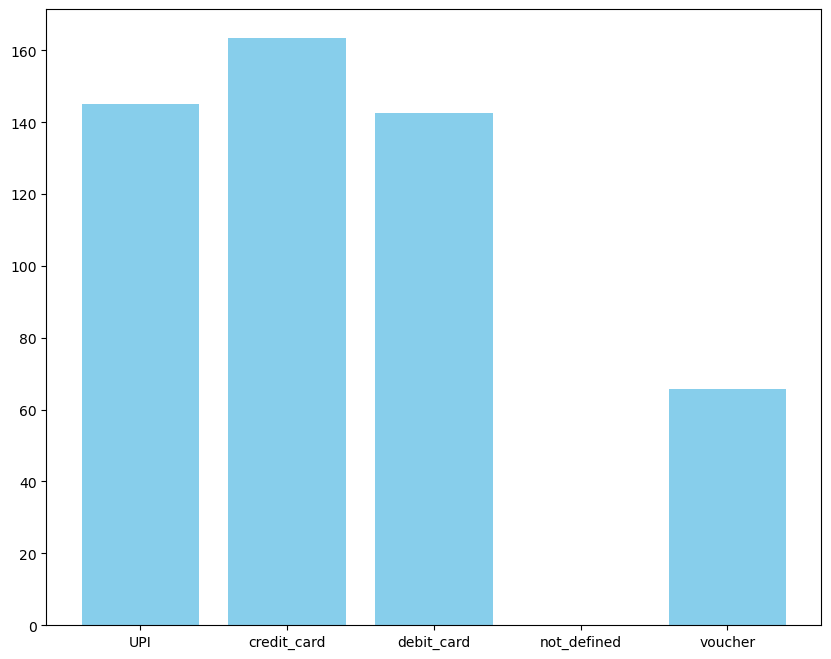

In [53]:
plt.figure(figsize=(10,8))
plt.bar(average_payment_for_each_payment_method ["payment_type"],average_payment_for_each_payment_method ["payment_value"],color = "skyblue")
plt.show()

# Total Number of Products in Each Product Category

In [54]:
products_df.columns

Index(['product_id', 'product category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [55]:
total_number_products_per_category=products_df.groupby("product category")["product_id"].count().reset_index()
total_number_products_per_category

,product category,product_id
0,Agro Industria e Comercio,74
1,Art,55
2,Arts and Crafts,19
3,Bags Accessories,349
4,Blu Ray DVDs,48
...,...,...
68,sport leisure,2867
69,stationary store,849
70,technical books,123
71,telephony,1134


# Identify the top customers by calculating the total value of their orders.


In [56]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [57]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [58]:
merged_data=pd.merge(orders_df,order_items_df,on="order_id")
merged_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [59]:
top_customers=merged_data.groupby("customer_id")["price"].sum().reset_index()
top_customers

,customer_id,price
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,78.00
98662,fffecc9f79fd8c764f843e9951b11341,54.90
98663,fffeda5b6d849fbd39689bb92087f431,47.90
98664,ffff42319e9b2d713724ae527742af25,199.90


# Summary and Conclusion

The analysis of customer data from 2016 to 2018 reveals several key insights that can guide business decisions and improve sales performance.

<b>Growth in Orders and Customer Engagement:</b>

There was a significant increase in order volume, growing from 329 orders in 2016 to 54,011 in 2018, showing an upward trend in customer engagement. The growing customer base, particularly in São Paulo and Rio de Janeiro, highlights potential for targeted marketing in these regions.

<b>Top Categories and Sales Distribution:</b>

The "Bed Table Bath" and "Health Beauty" categories led in total sales, contributing 8.43% and 8.16% of overall revenue, respectively. Focusing on high-performing categories and aligning marketing efforts can further drive growth.

<b>Customer Spending Trends:</b>

Top customers significantly contributed to revenue, with the highest spender in 2017 paying $13,664.08. Encouraging installment payments, which correlate with higher order values, can boost sales.

<b>Sales by Payment Method:</b>

Credit cards dominated transactions, accounting for the majority of payments. Expanding UPI and voucher options while enhancing the user experience for credit card payments can diversify payment options and attract more customers.

<b>Efficient Delivery Process:</b>

The analysis shows that orders are being delivered on average 12 days earlier than estimated, suggesting an efficient logistics system. Maintaining or improving this trend will boost customer satisfaction and loyalty.

<b>Opportunities for Improvement:</b>

Address late deliveries (7,827 instances) to enhance customer satisfaction and streamline logistics.
Analyze the relationship between high shipping costs and product profitability to optimize pricing strategies.

# Recommendations for Increasing Sales

<b>Target High-Value Customers:</b>

Implement loyalty programs or exclusive offers for top customers, especially those with significant spending history, to encourage repeat purchases.

<b>Expand in High-Demand Categories:</b>

Increase inventory and marketing efforts in popular categories like Bed Table Bath and Health Beauty to capture growing customer interest.

<b>Optimize Payment Flexibility:</b>

Promote installment payment options to encourage higher-value purchases, as there’s a positive correlation between installment use and order value.

<b>Regional Marketing:</b>

Focus on expanding in top-performing regions like São Paulo, which has the highest number of orders, to capitalize on market demand.

<b>Maintain Fast Delivery:</b>

Leverage the existing efficient delivery process as a competitive advantage while addressing any cases of late deliveries to improve overall service quality.


# E-Commerce Operations Process

In an e-commerce environment, efficient operations require a seamless connection between inventory management, order processing, and logistics. Key processes include:

Inventory Management: Ensure sufficient stock in high-demand categories while keeping track of product turnover rates.

Order Fulfillment: Optimize picking, packing, and shipping processes to ensure timely delivery. Use data insights to predict peak times for staffing and resource allocation.

Logistics & Delivery: Partner with reliable delivery services to maintain early or on-time deliveries. Monitoring delivery performance is essential to maintain customer satisfaction.

Customer Support: A responsive customer service team is critical for handling queries related to orders, returns, and complaints, improving the overall shopping experience.